In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# b. Load the training and testing data (CIFAR10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
# c. Define the network architecture using Keras
model = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),                      # Converts 3D image to 1D vector
    Dense(256, activation='relu'),  # Hidden Layer
    Dense(128, activation='relu'),  # Hidden Layer
    Dense(10, activation='softmax') # Output Layer (10 classes)
])

In [4]:

# d. Train the model using SGD optimizer
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=10,
                    validation_data=(x_test, y_test))



Epoch 1/10
782/782 [==============================] - 12s 13ms/step - loss: 1.9388 - accuracy: 0.3086 - val_loss: 1.9182 - val_accuracy: 0.3086
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.7623 - accuracy: 0.3793 - val_loss: 1.8434 - val_accuracy: 0.3363
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6849 - accuracy: 0.4076 - val_loss: 1.8201 - val_accuracy: 0.3459
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6315 - accuracy: 0.4264 - val_loss: 1.7260 - val_accuracy: 0.4049
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5937 - accuracy: 0.4391 - val_loss: 1.6446 - val_accuracy: 0.4096
Epoch 6/10
782/782 [==============================] - 7s 8ms/step - loss: 1.5615 - accuracy: 0.4492 - val_loss: 1.5920 - val_accuracy: 0.4350
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 1.5316 - accuracy: 0.4611 - val_loss: 1.5802 - val_accuracy: 0.4369
Ep

In [6]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.4668000042438507


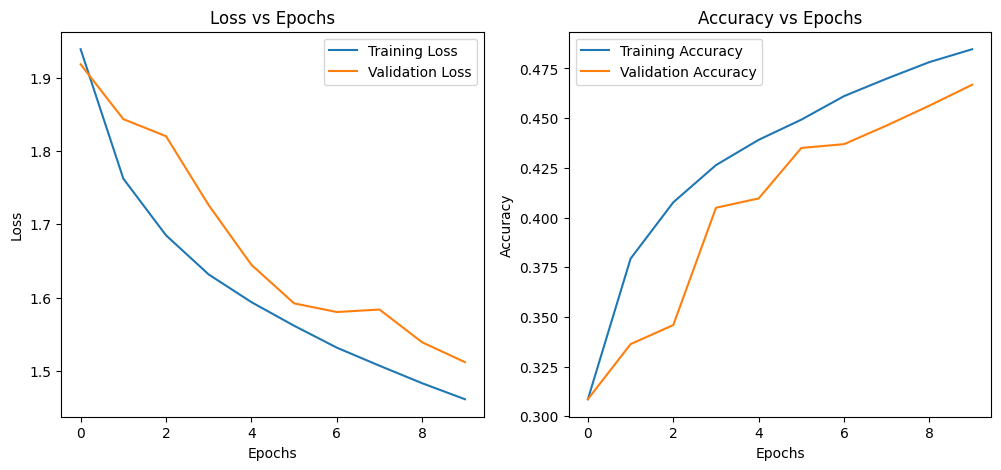

In [7]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.show()